In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Load data
df = pd.read_csv("hotel_bookings.csv")


# **Data** **Cleaning**

In [28]:
print(df.shape)
print(df.info())
display(df.describe(include="all"))

(119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  mea

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


                                Missing Values    Percent
company                                 112593  94.306893
agent                                    16340  13.686238
country                                    488   0.408744
children                                     4   0.003350
arrival_date_month                           0   0.000000
arrival_date_week_number                     0   0.000000
hotel                                        0   0.000000
is_canceled                                  0   0.000000
stays_in_weekend_nights                      0   0.000000
arrival_date_day_of_month                    0   0.000000
adults                                       0   0.000000
stays_in_week_nights                         0   0.000000
babies                                       0   0.000000
meal                                         0   0.000000
lead_time                                    0   0.000000
arrival_date_year                            0   0.000000
distribution_c

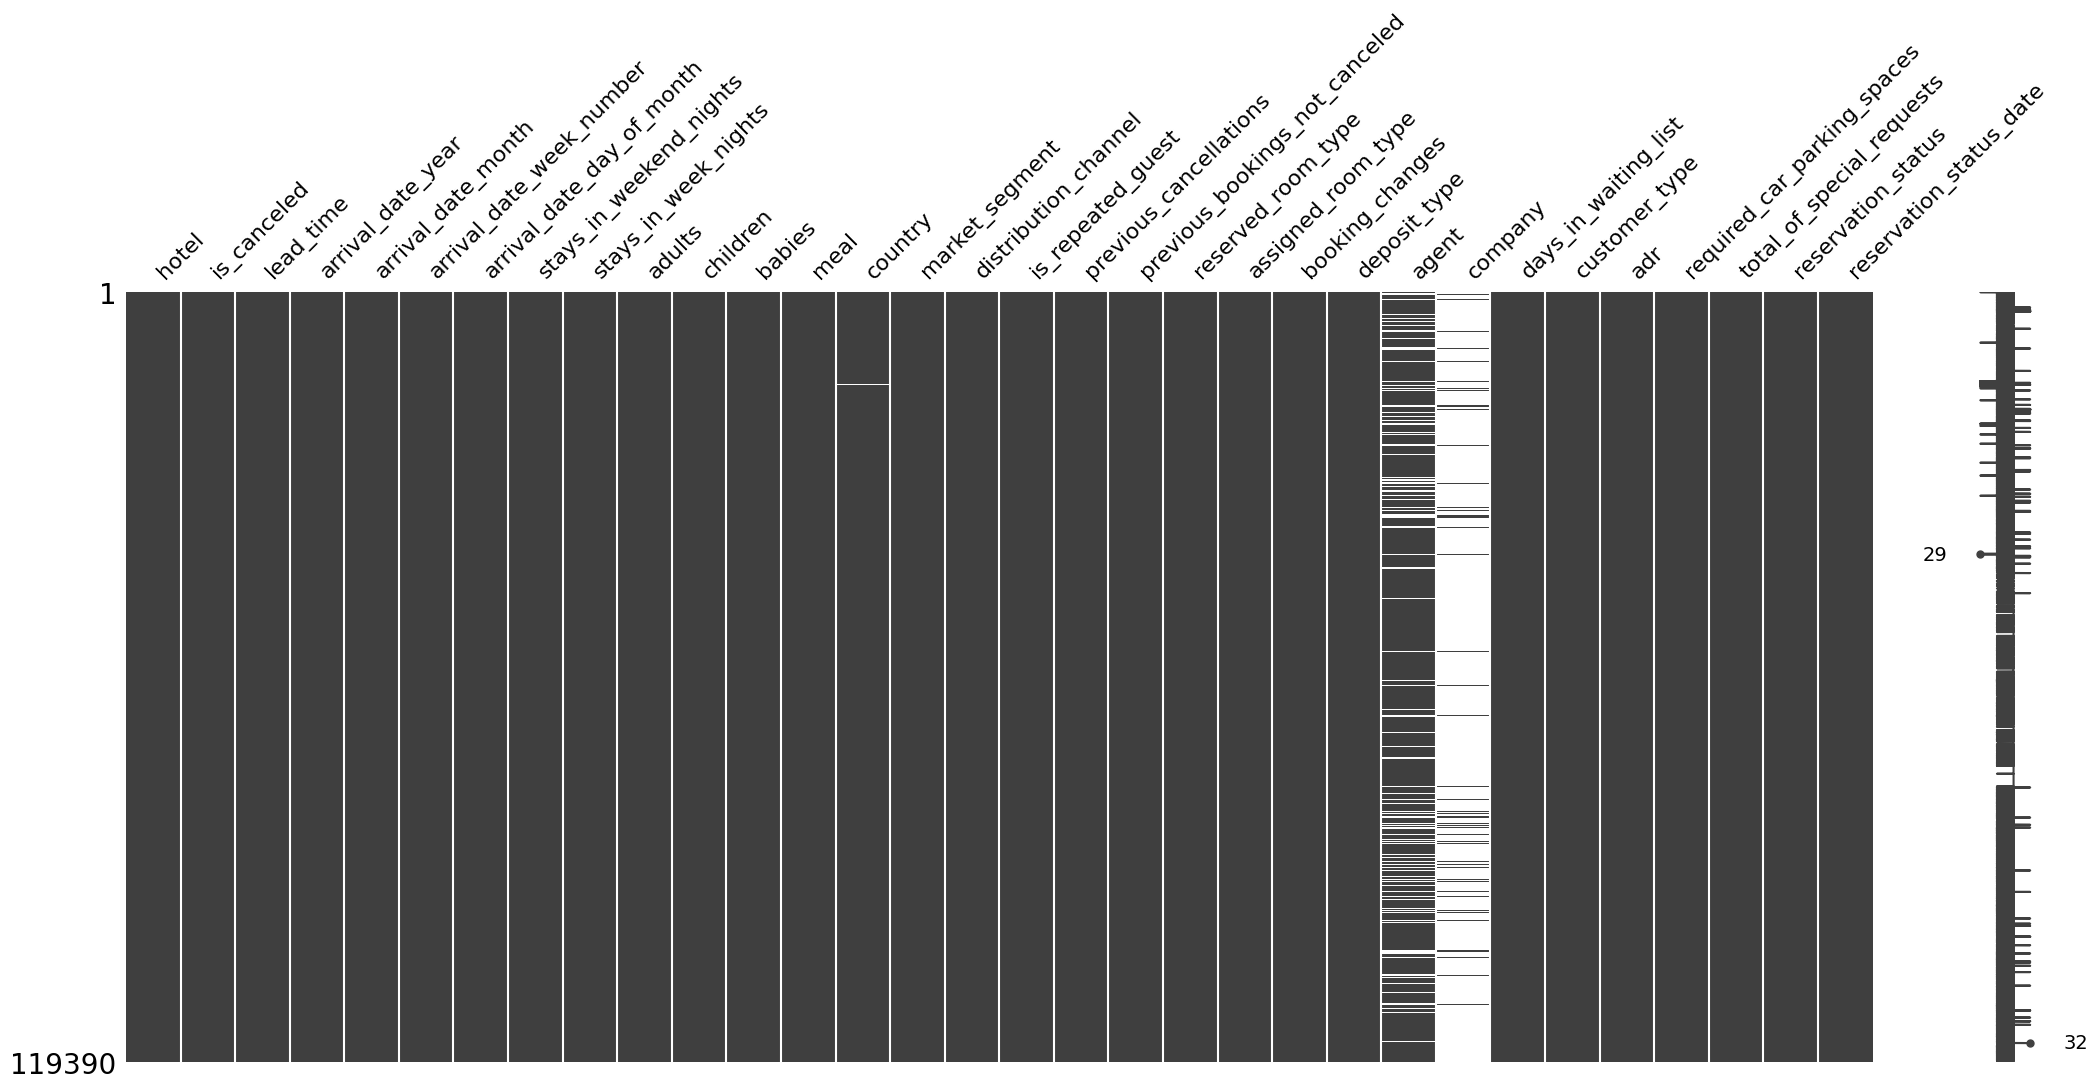

In [29]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing, "Percent": missing_percent})
print(missing_df)

# Visualization
msno.matrix(df)
plt.show()

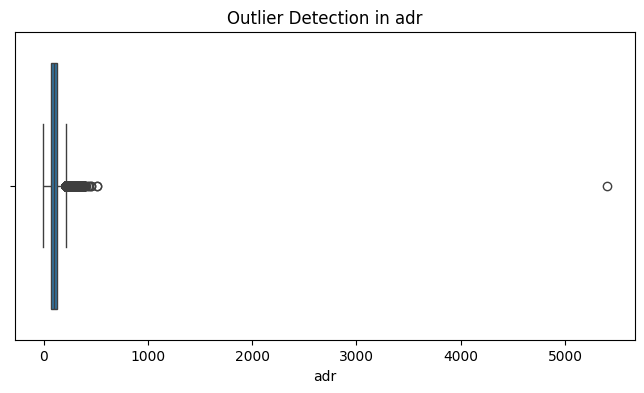

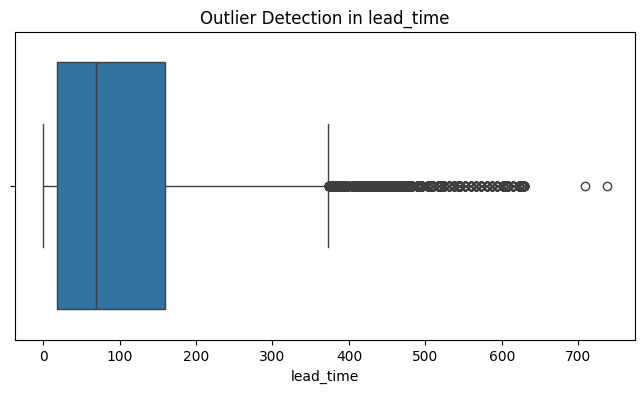

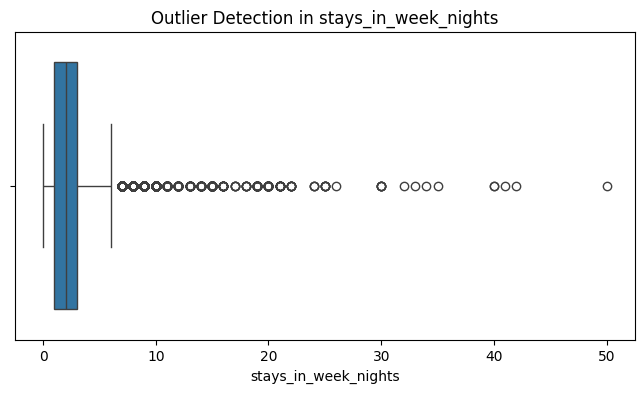

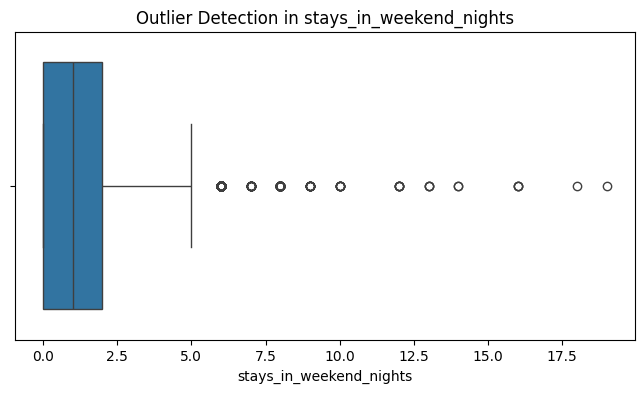

Outliers in adr: 3793


In [30]:
numerical_cols = ["adr", "lead_time", "stays_in_week_nights", "stays_in_weekend_nights"]
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection in {col}")
    plt.show()

# IQR method
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return data[(data[col] < lower) | (data[col] > upper)]

outliers_adr = detect_outliers_iqr(df, "adr")
print(f"Outliers in adr: {len(outliers_adr)}")

In [31]:
df["company"].fillna(0, inplace=True)
df["agent"].fillna(0, inplace=True)

# country → impute with mode
df["country"].fillna(df["country"].mode()[0], inplace=True)

# children → impute with median
df["children"].fillna(df["children"].median(), inplace=True)

/tmp/ipython-input-1000697855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["company"].fillna(0, inplace=True)
/tmp/ipython-input-1000697855.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [32]:
df.drop_duplicates(inplace=True)


In [33]:
# Cap ADR
df.loc[df["adr"] > 1000, "adr"] = 1000


In [34]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df["arrival_date_year"] = df["arrival_date_year"].astype(int)


In [35]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = df.apply(lambda x: 1 if (x["children"] > 0 or x["babies"] > 0) else 0, axis=1)



In [36]:
# Drop leakage columns
df.drop(["reservation_status", "reservation_status_date"], axis=1, inplace=True)

# One-hot encode low-cardinality categorical vars
low_cardinality = ["meal", "market_segment", "distribution_channel", "deposit_type"]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)

# Frequency encode high-cardinality vars (e.g., country)
country_counts = df["country"].value_counts().to_dict()
df["country_freq"] = df["country"].map(country_counts)
df.drop("country", axis=1, inplace=True)


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop("is_canceled", axis=1)  # target column is usually "is_canceled"
y = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape)


(69901, 45) (17476, 45)


# **EDA**

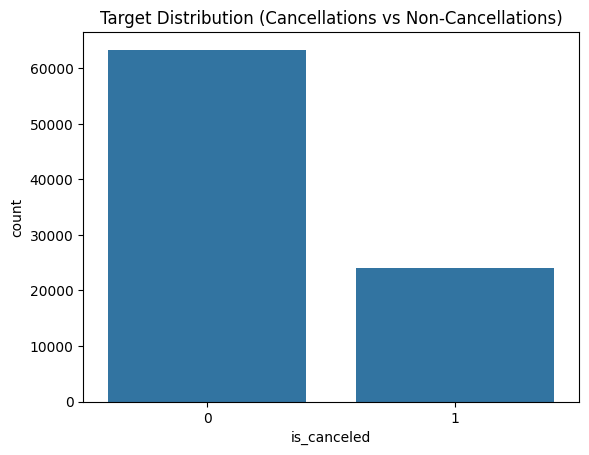

is_canceled
0    0.725054
1    0.274946
Name: proportion, dtype: float64


In [58]:
# Target distribution
sns.countplot(x=df["is_canceled"])
plt.title("Target Distribution (Cancellations vs Non-Cancellations)")
plt.show()

print(df["is_canceled"].value_counts(normalize=True))


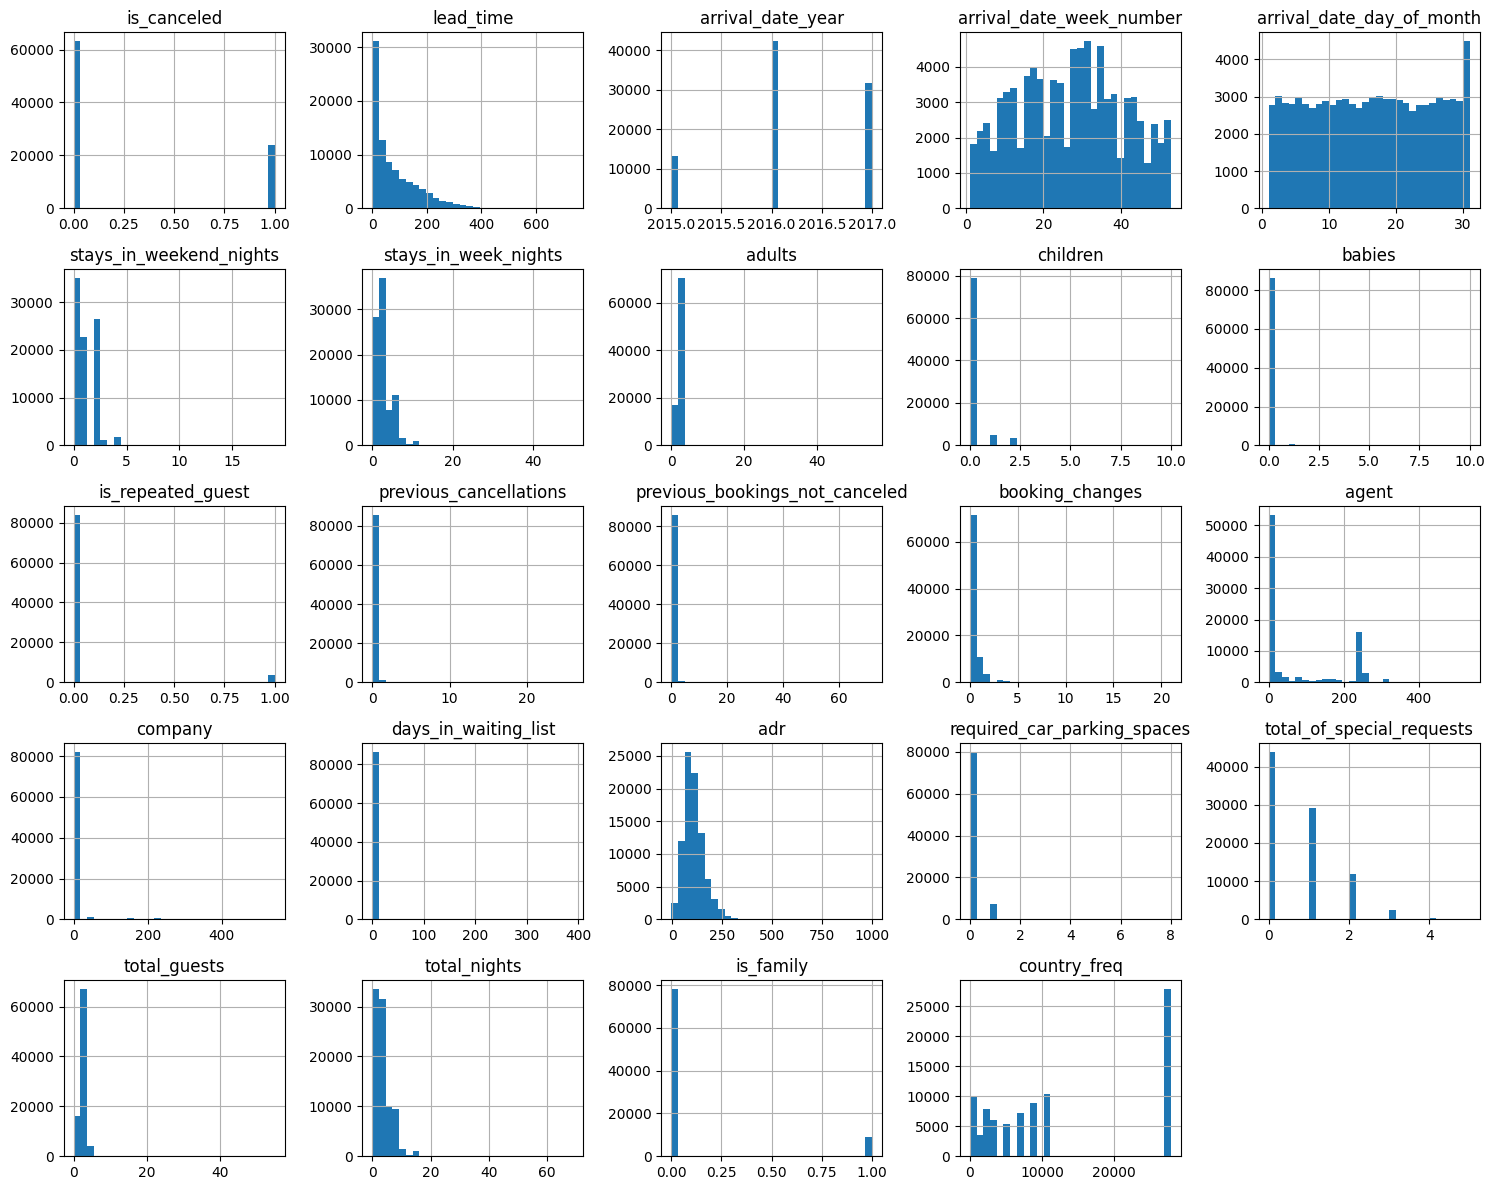

In [39]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Histograms
df[num_cols].hist(figsize=(15,12), bins=30)
plt.tight_layout()
plt.show()




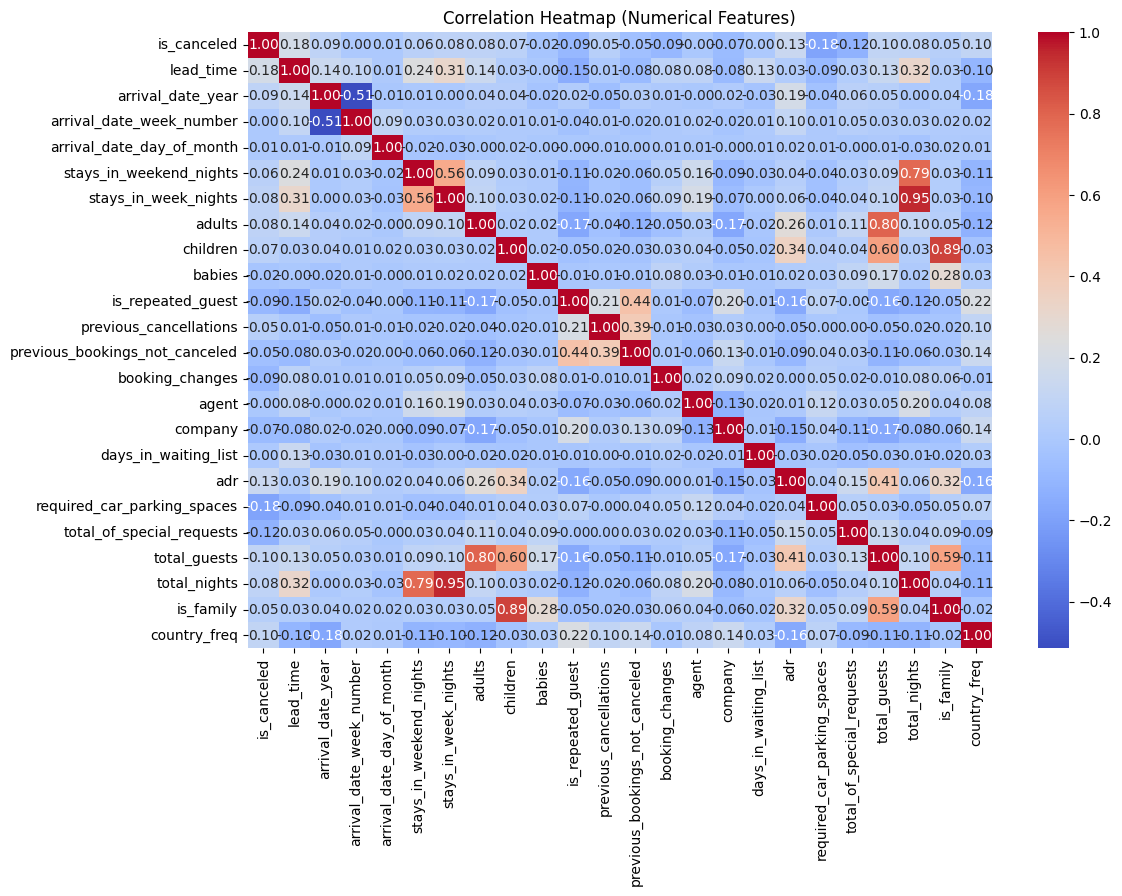

In [40]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

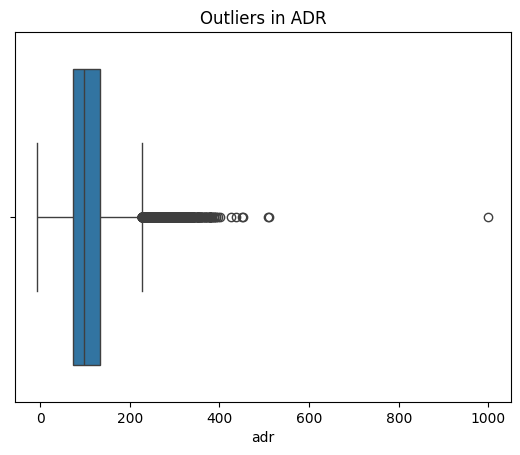

In [41]:
sns.boxplot(x=df["adr"])
plt.title("Outliers in ADR")
plt.show()

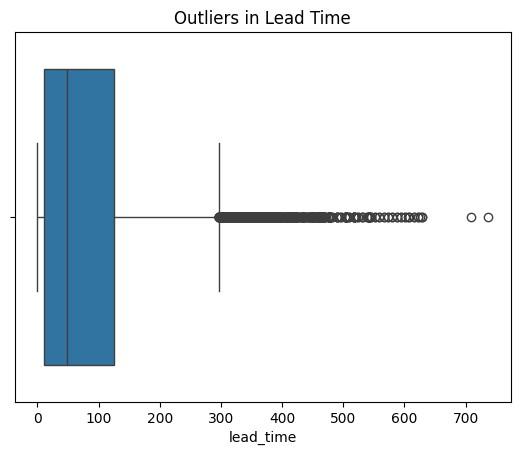

In [42]:
sns.boxplot(x=df["lead_time"])
plt.title("Outliers in Lead Time")
plt.show()


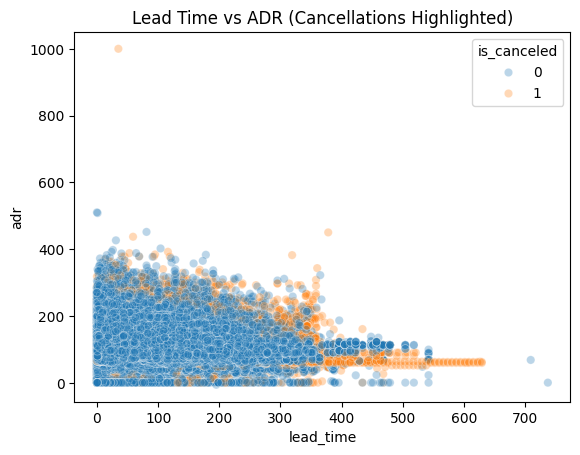

In [43]:
sns.scatterplot(x="lead_time", y="adr", data=df, hue="is_canceled", alpha=0.3)
plt.title("Lead Time vs ADR (Cancellations Highlighted)")
plt.show()


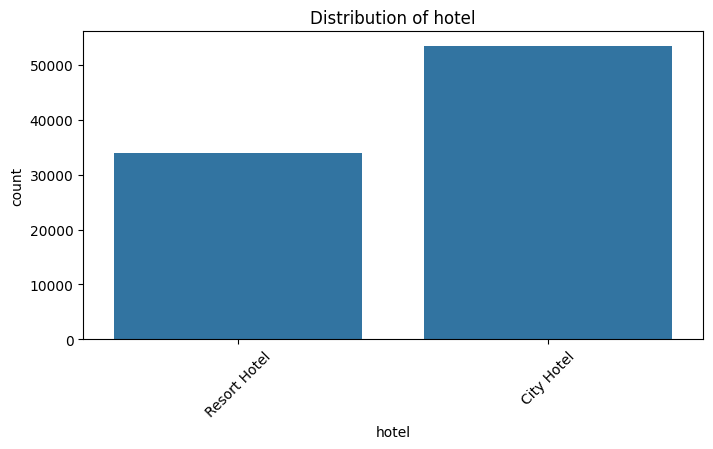

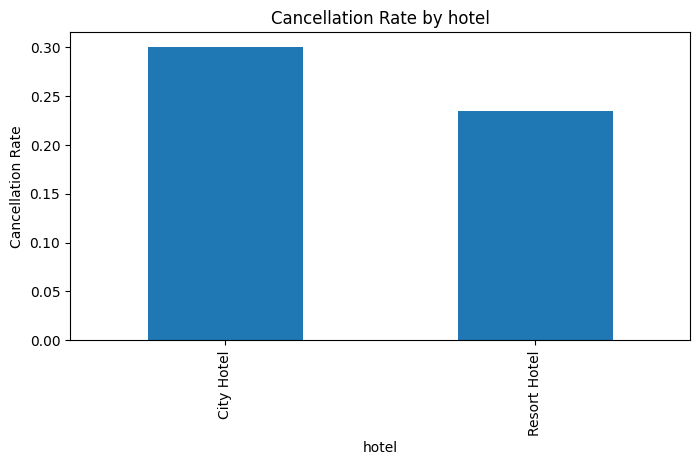

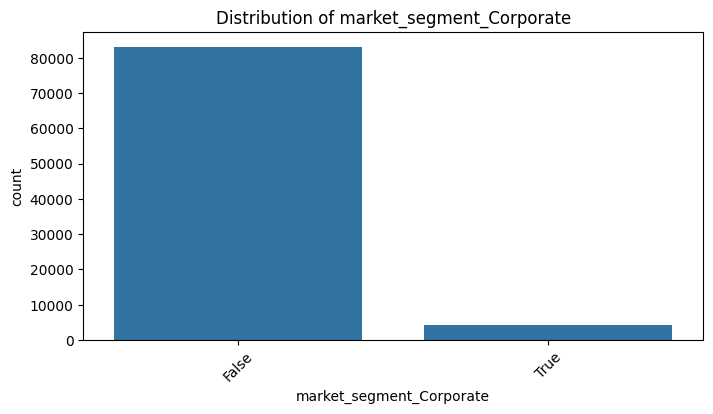

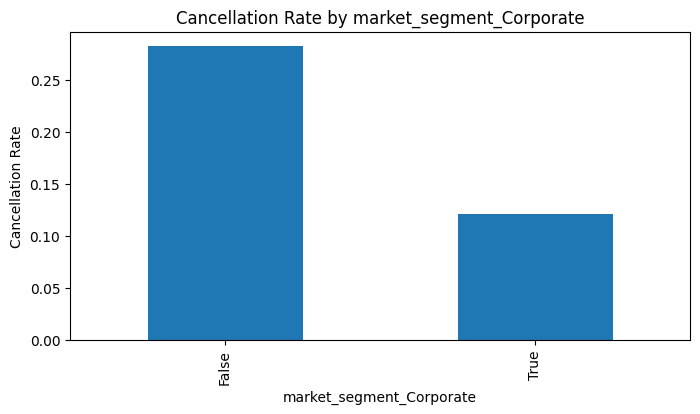

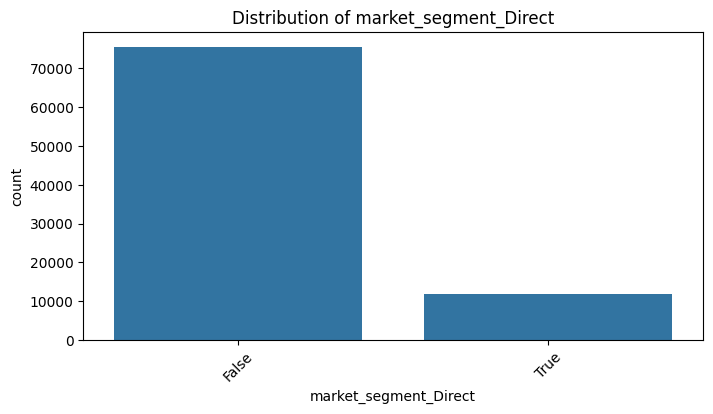

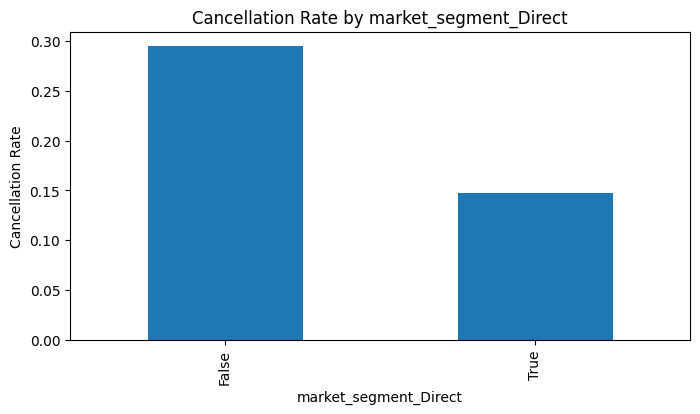

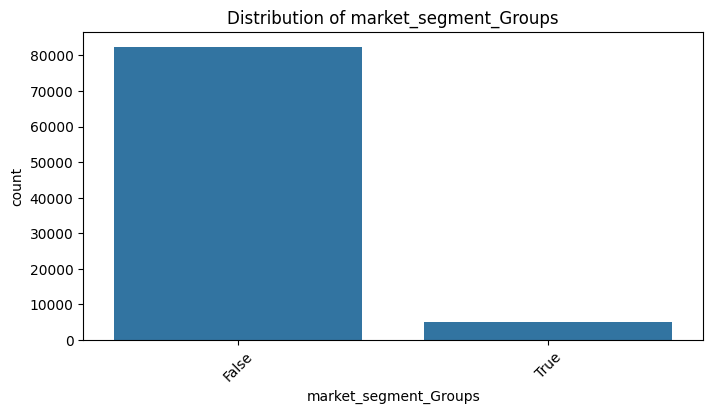

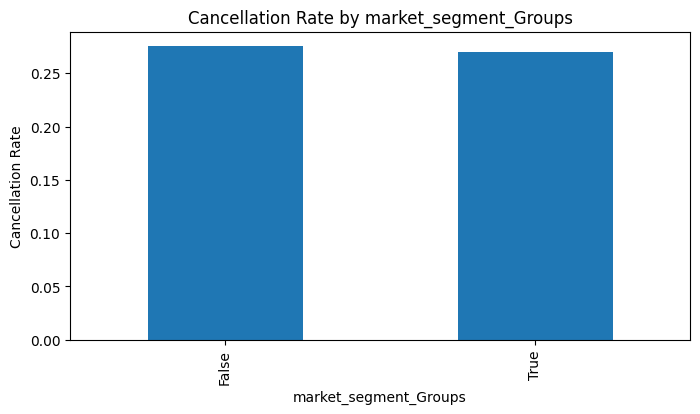

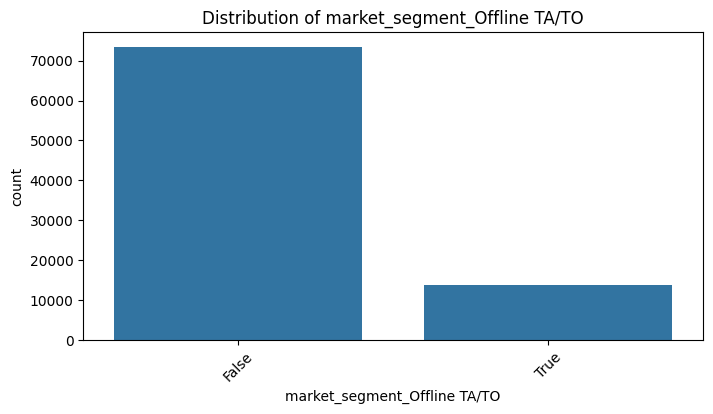

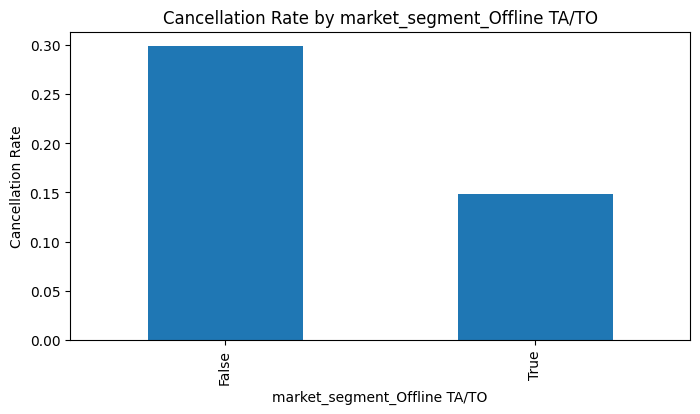

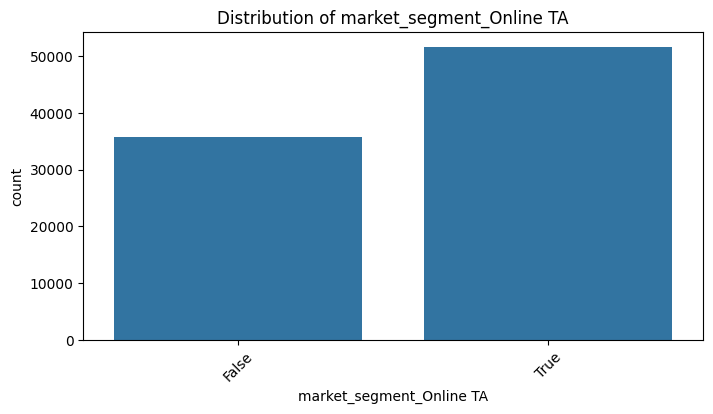

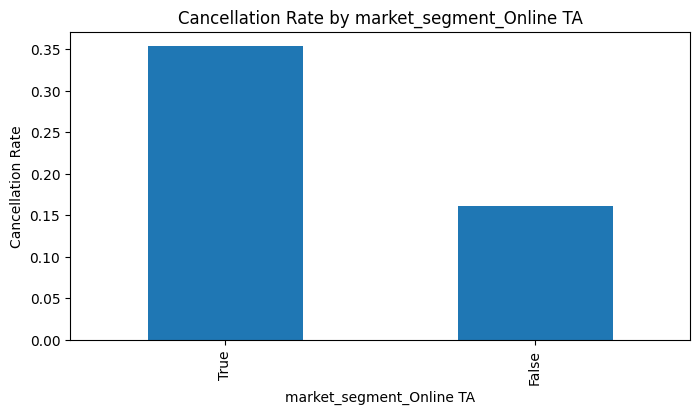

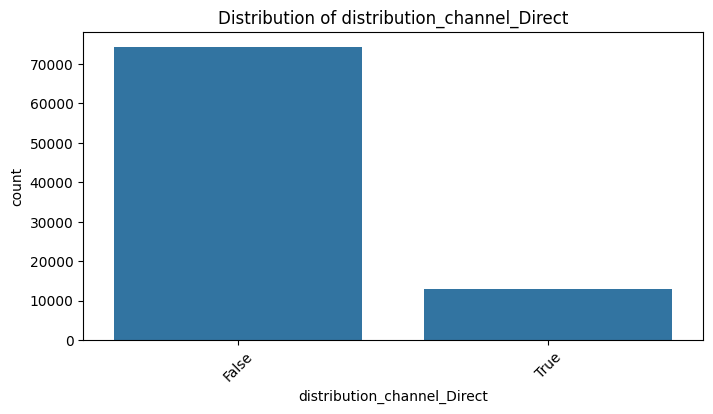

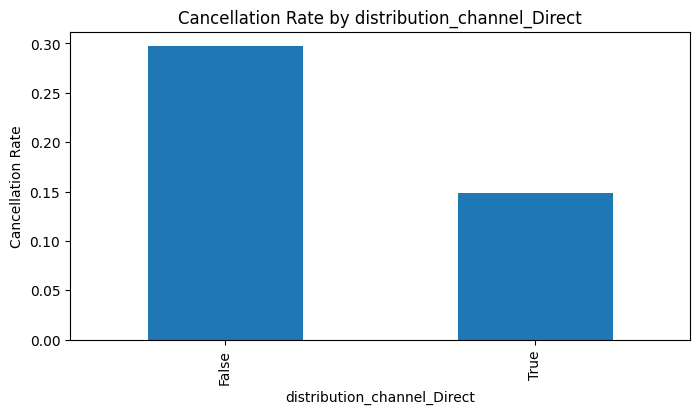

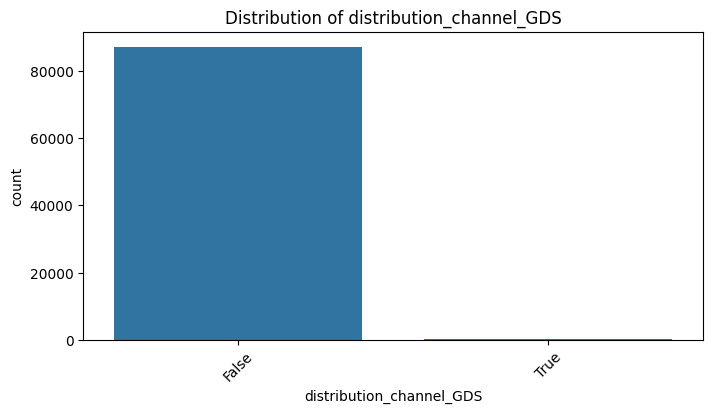

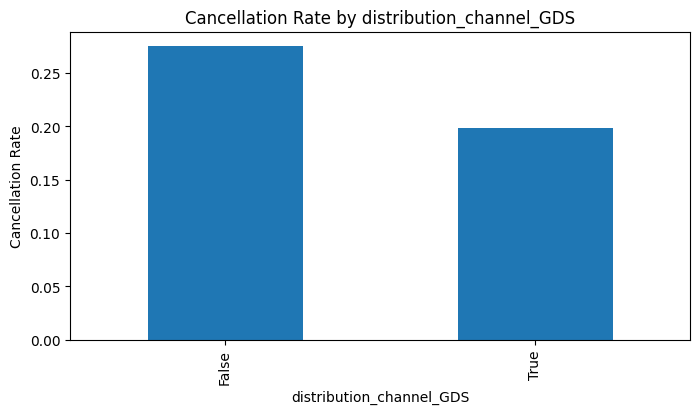

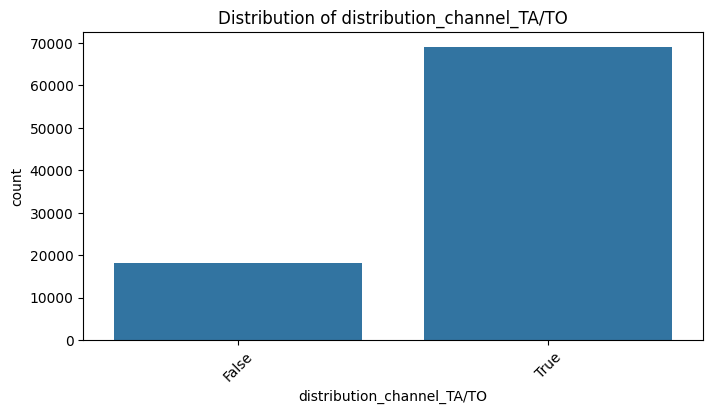

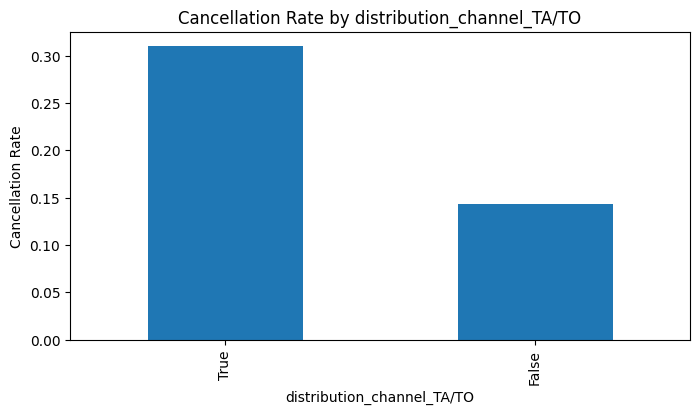

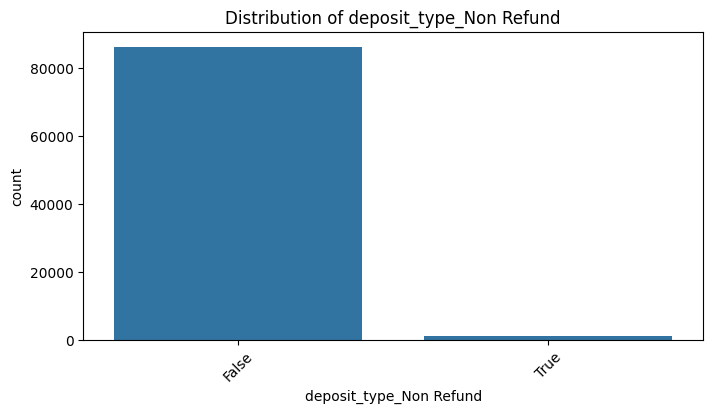

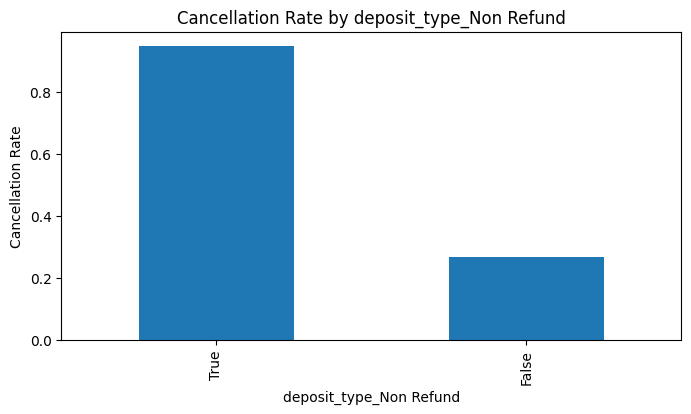

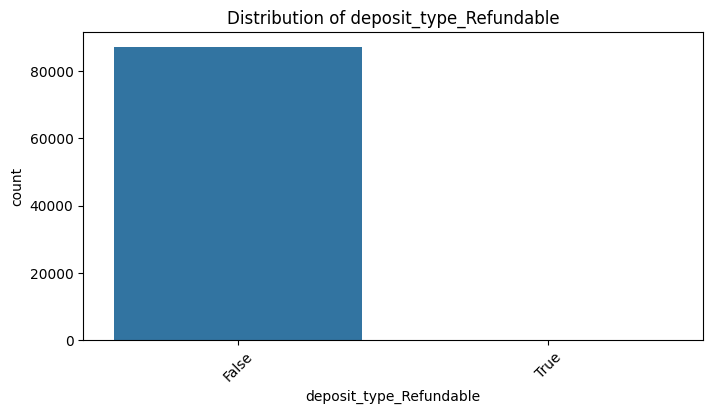

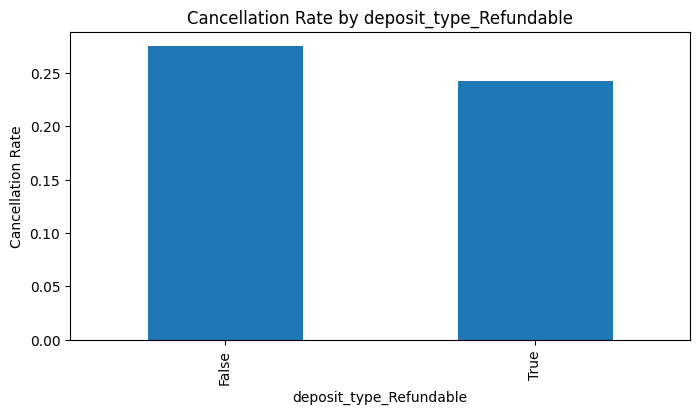

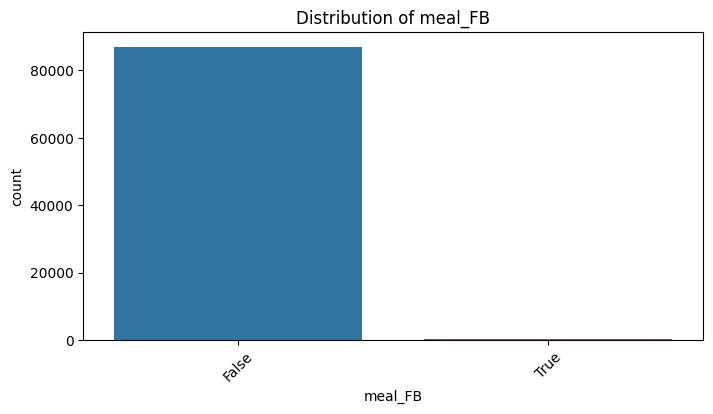

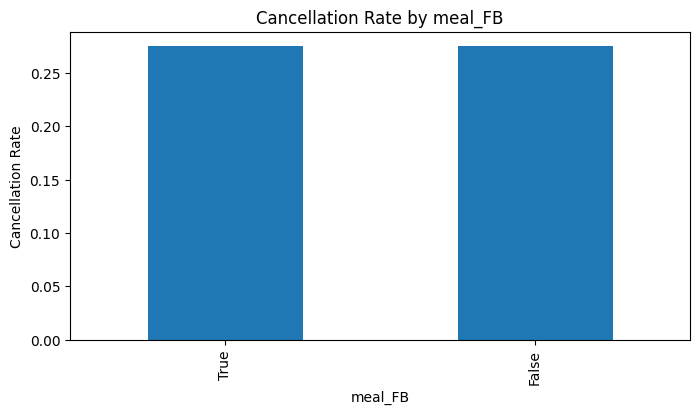

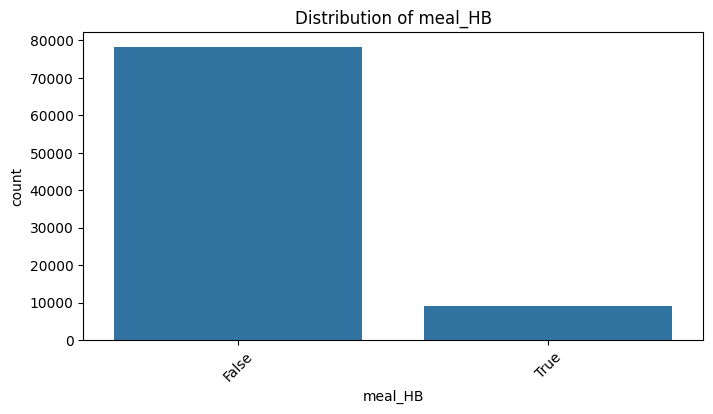

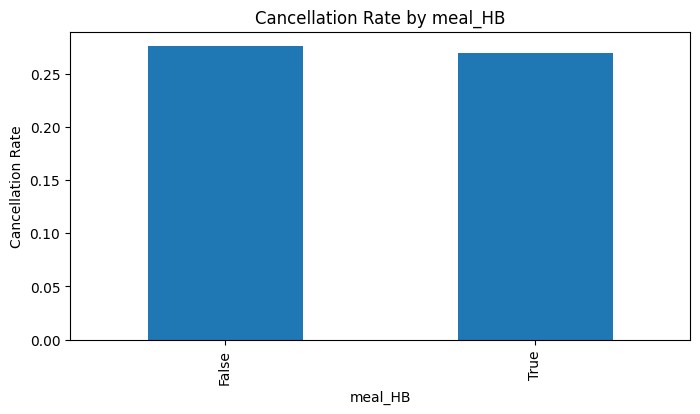

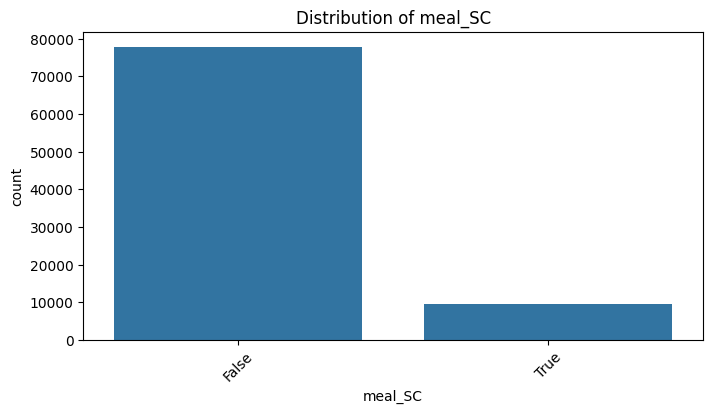

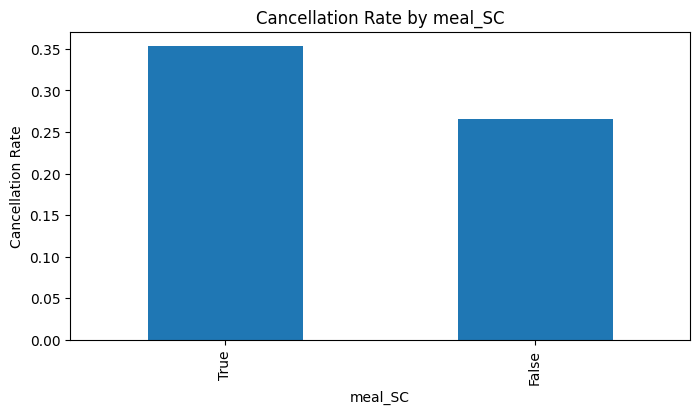

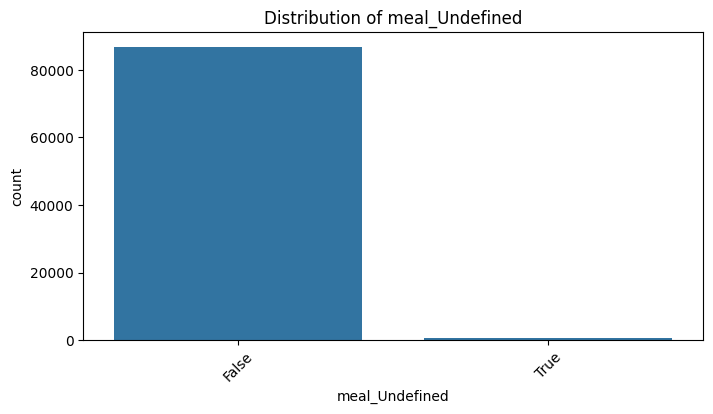

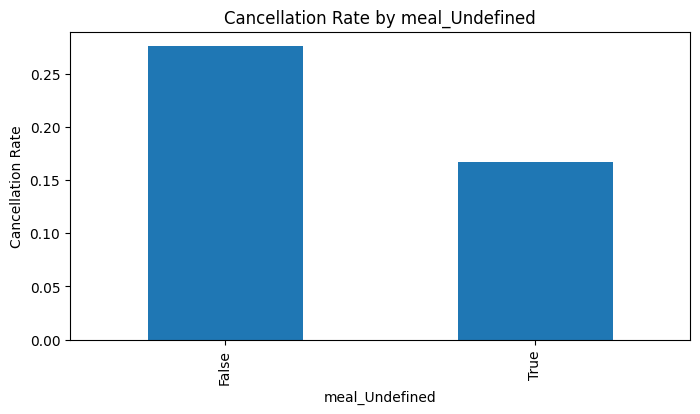

In [46]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in ["hotel", "market_segment_Corporate", "market_segment_Direct", "market_segment_Groups", "market_segment_Offline TA/TO", "market_segment_Online TA", "distribution_channel_Direct", "distribution_channel_GDS", "distribution_channel_TA/TO", "deposit_type_Non Refund", "deposit_type_Refundable", "meal_FB", "meal_HB", "meal_SC", "meal_Undefined"]:
    if col in df.columns: # Check if the column exists in the DataFrame
        plt.figure(figsize=(8,4))
        sns.countplot(x=col, data=df)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()

        # Cancellation rate by category
        cancel_rate = df.groupby(col)["is_canceled"].mean().sort_values(ascending=False)
        cancel_rate.plot(kind="bar", figsize=(8,4))
        plt.title(f"Cancellation Rate by {col}")
        plt.ylabel("Cancellation Rate")
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame.")

/tmp/ipython-input-1995703818.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order=pd.date_range("2000-01", "2000-12", freq="M").strftime("%B"))


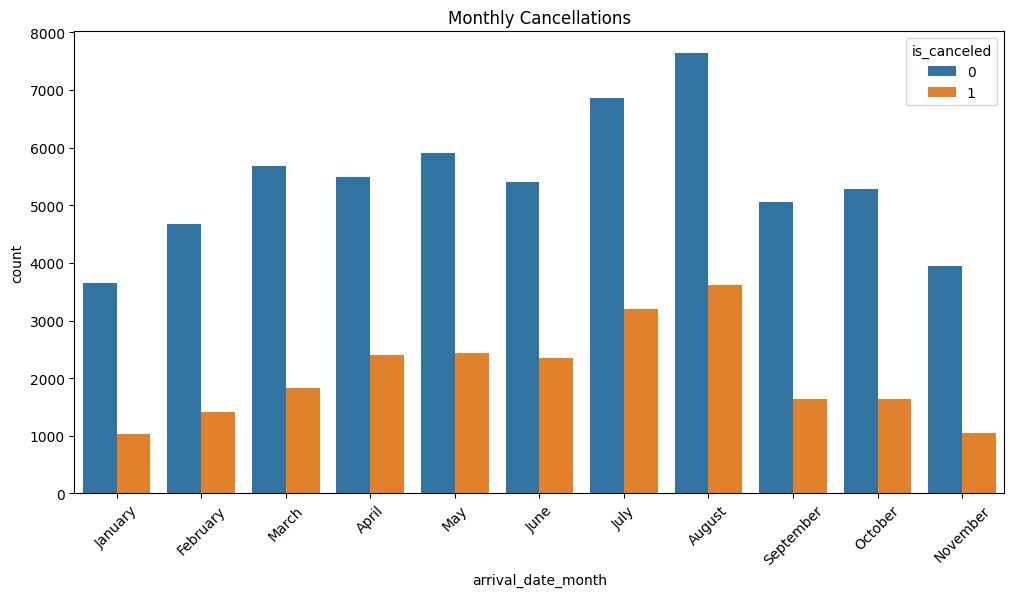

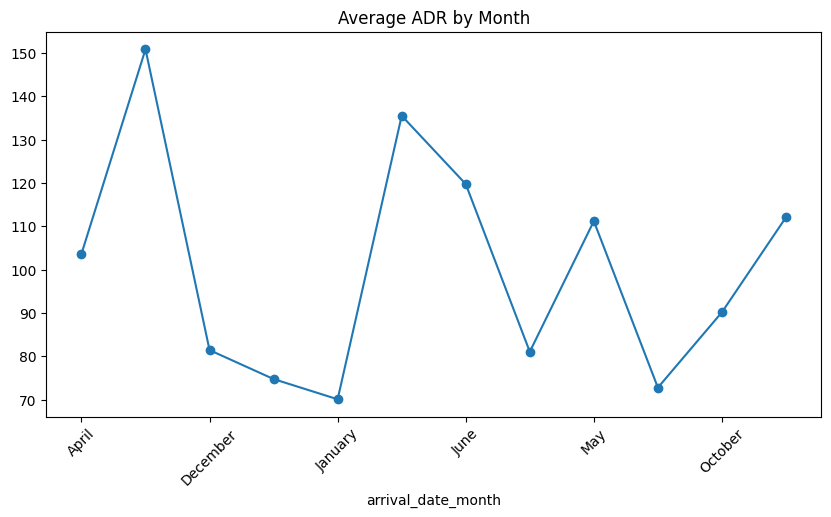

In [47]:
# Booking cancellations by month
plt.figure(figsize=(12,6))
sns.countplot(x="arrival_date_month", hue="is_canceled", data=df,
              order=pd.date_range("2000-01", "2000-12", freq="M").strftime("%B"))
plt.title("Monthly Cancellations")
plt.xticks(rotation=45)
plt.show()

# ADR trend by month
monthly_adr = df.groupby("arrival_date_month")["adr"].mean()
monthly_adr.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Average ADR by Month")
plt.xticks(rotation=45)
plt.show()


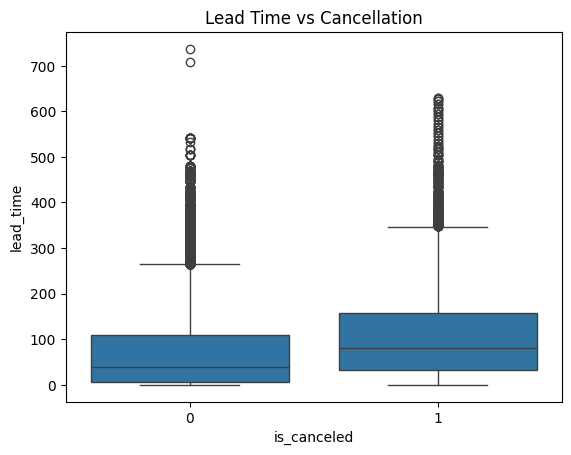

/tmp/ipython-input-1886788283.py:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="is_canceled", y="adr", data=df, scale="width")


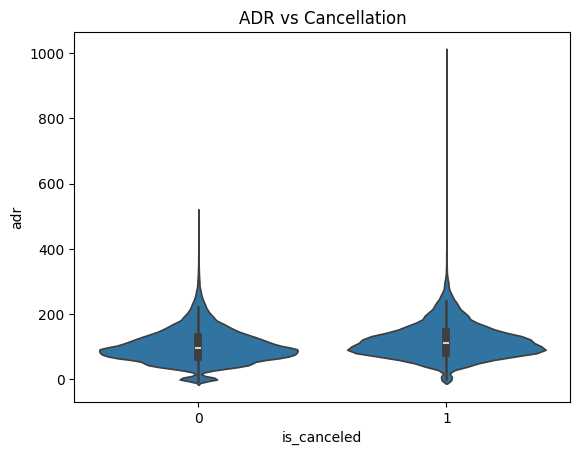

In [48]:
sns.boxplot(x="is_canceled", y="lead_time", data=df)
plt.title("Lead Time vs Cancellation")
plt.show()

sns.violinplot(x="is_canceled", y="adr", data=df, scale="width")
plt.title("ADR vs Cancellation")
plt.show()


# **Statistical Analysis**

In [50]:
# One-hot encode remaining categorical columns
remaining_cat_cols = ["hotel", "arrival_date_month", "reserved_room_type", "assigned_room_type", "customer_type"]
df = pd.get_dummies(df, columns=remaining_cat_cols, drop_first=True)

corr_target = df.corr()["is_canceled"].sort_values(ascending=False)
print(corr_target)

is_canceled                     1.000000
market_segment_Online TA        0.211305
lead_time                       0.184723
deposit_type_Non Refund         0.165044
distribution_channel_TA/TO      0.151510
                                  ...   
market_segment_Direct          -0.113018
distribution_channel_Direct    -0.118475
total_of_special_requests      -0.120580
market_segment_Offline TA/TO   -0.123108
required_car_parking_spaces    -0.184250
Name: is_canceled, Length: 76, dtype: float64


In [51]:
import scipy.stats as stats

# Baseline cancellation rate
cancel_rate = df["is_canceled"].mean()
print(f"Overall Cancellation Rate: {cancel_rate:.2%}")


Overall Cancellation Rate: 27.49%


In [52]:
canceled = df[df["is_canceled"] == 1]["adr"]
not_canceled = df[df["is_canceled"] == 0]["adr"]

# Normality check (Shapiro test for smaller samples, else visual inspection)
print(stats.shapiro(canceled.sample(500))[1])
print(stats.shapiro(not_canceled.sample(500))[1])

# Since ADR is usually skewed, use Mann-Whitney U test (non-parametric)
stat, p = stats.mannwhitneyu(canceled, not_canceled, alternative="two-sided")
print(f"Mann-Whitney U test for ADR: p-value = {p:.4f}")


6.281309734399407e-14
3.3266351888363226e-13
Mann-Whitney U test for ADR: p-value = 0.0000


In [53]:
num_features = ["lead_time", "adr", "total_guests", "total_nights"]

for col in num_features:
    c1 = df[df["is_canceled"] == 1][col]
    c0 = df[df["is_canceled"] == 0][col]

    stat, p = stats.mannwhitneyu(c1, c0)
    print(f"{col}: p-value = {p:.4f}")


lead_time: p-value = 0.0000
adr: p-value = 0.0000
total_guests: p-value = 0.0000
total_nights: p-value = 0.0000


In [54]:
cat_features = ["hotel", "meal", "market_segment", "distribution_channel", "deposit_type"]

for col in cat_features:
    if col in df.columns:
        contingency = pd.crosstab(df[col], df["is_canceled"])
        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        print(f"{col}: p-value = {p:.4f}")


In [55]:
corr = df.corr()["is_canceled"].sort_values(ascending=False)
print(corr)


is_canceled                     1.000000
market_segment_Online TA        0.211305
lead_time                       0.184723
deposit_type_Non Refund         0.165044
distribution_channel_TA/TO      0.151510
                                  ...   
market_segment_Direct          -0.113018
distribution_channel_Direct    -0.118475
total_of_special_requests      -0.120580
market_segment_Offline TA/TO   -0.123108
required_car_parking_spaces    -0.184250
Name: is_canceled, Length: 76, dtype: float64


In [56]:
def cohens_d(x1, x2):
    n1, n2 = len(x1), len(x2)
    s1, s2 = x1.std(), x2.std()
    s_pooled = ((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2)
    s_pooled = s_pooled**0.5
    return (x1.mean() - x2.mean()) / s_pooled

for col in num_features:
    d = cohens_d(df[df["is_canceled"]==1][col],
                 df[df["is_canceled"]==0][col])
    print(f"Cohen's d for {col}: {d:.2f}")


Cohen's d for lead_time: 0.42
Cohen's d for adr: 0.30
Cohen's d for total_guests: 0.23
Cohen's d for total_nights: 0.19


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_num = df[num_features].dropna()
vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i)
                   for i in range(X_num.shape[1])]
print(vif_data)


        Feature       VIF
0     lead_time  2.071173
1           adr  5.465439
2  total_guests  6.377814
3  total_nights  2.810117
